In [56]:
import json
import numpy as np
import dicom
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

In [57]:
# Path where the min / max per slice per patient is located
path = '/masvol/output/dsb/volume/1/3roi/'

In [151]:
# Function to ge the volume. If v_type is None then the V = (Area_i + Area_i+1)((L_i - L_i+1)/2) is
# used, otherwise, it is V = (Area_i + Area_i+1 + np.sqrt(Area_i * Area_i+1))((L_i - L_i+1)/3)
def getVolume(patient,patientdict, v_type = None):
    es= {}
    ed = {}
    noSL = []
    noMin = []
    noMax = []
    numSlices = 0
    issues = {}
    for i in patientdict:
        numSlices = len(patientdict.keys())
        if len(patientdict.keys()) < 5:
             print ('Less than five slices')    

        if patientdict[i]['minSL'] is None: 
#             print ('MinSL: ', patientdict[i])
            noSL.append(patientdict[i]['zminframe'])
        else: 
            if patientdict[i]['zmin'] ==0:
#                 print ('zmin: ', patientdict[i])
                noMin.append(patientdict[i]['zminframe'])
            es[patientdict[i]['minSL']] = {'zmin': patientdict[i]['zmin'],
                                          'minST':patientdict[i]['minST']}
    
        if patientdict[i]['maxSL'] is None:
#             print ('MaxSL: ', patientdict[i])
            noSL.append(patientdict[i]['zmaxframe'])
        else:
            if patientdict[i]['zmax'] ==0:
#                 print ('zmax: ', patientdict[i])
                noMax.append(patientdict[i]['zmaxframe'])
            ed[patientdict[i]['maxSL']] = {'zmax': patientdict[i]['zmax'],
                                          'maxST':patientdict[i]['maxST']}
    
    ESV=0
    a = sorted(es)
#     print (a)
    for i in range(len(a)-1):
        if v_type is None:
            if (i+1) == (len(a)-1):
#                 ESVi = (es[a[i]]['zmin'] + es[a[i+1]]['zmin']) * ((abs(a[i]-a[i+1]-es[a[i+1]]['minST']))/2)
                ESVi = ((es[a[i]]['zmin'] + es[a[i+1]]['zmin']) * ((abs(a[i]-a[i+1]))/2)) + (es[a[i+1]]['zmin'] * es[a[i+1]]['minST'])
#                 print ('ESVi:', ESVi)
            else:
                ESVi = (es[a[i]]['zmin'] + es[a[i+1]]['zmin']) * ((abs(a[i]-a[i+1]))/2)
#                 print ('ESVi:', ESVi)
        else: 
            if (i+1) == (len(a)-1):
                 ESVi = (es[a[i]]['zmin'] + es[a[i+1]]['zmin'] + np.sqrt(es[a[i]]['zmin'] * es[a[i+1]]['zmin'])) * ((abs(a[i]-a[i+1]-(es[a[i+1]]['minST'])))/3)
            else:
                ESVi = (es[a[i]]['zmin'] + es[a[i+1]]['zmin'] + np.sqrt(es[a[i]]['zmin'] * es[a[i+1]]['zmin'])) * ((abs(a[i]-a[i+1]))/3)
            
        ESV = ESV + ESVi
    ESV = ESV/1000
    EDV=0
    b = sorted(ed)
    for i in range(len(b)-1):
        if v_type is None:
            if (i+1) == (len(b)-1):
#                 EDVi = (ed[b[i]]['zmax'] + ed[b[i+1]]['zmax']) * ((abs(b[i]-b[i+1]-ed[b[i+1]]['maxST']))/2)
#                 print( 'EDVi:', EDVi, 'height, ST:', (abs(b[i]-b[i+1]-(ed[b[i+1]]['maxST']))))
                EDVi = ((ed[b[i]]['zmax'] + ed[b[i+1]]['zmax']) * ((abs(b[i]-b[i+1]))/2)) + (ed[b[i+1]]['zmax'] * ed[b[i+1]]['maxST'])
            else:
                EDVi = (ed[b[i]]['zmax'] + ed[b[i+1]]['zmax']) * ((abs(b[i]-b[i+1]))/2)
#                 print ('EDVi:', EDVi, 'height, ST:', (abs(b[i]-b[i+1])), ed[b[i]]['maxST'], ed[b[i+1]]['maxST'])
        else:
            if (i+1) == (len(b)-1):
                EDVi = (ed[b[i]]['zmax'] + ed[b[i+1]]['zmax'] + np.sqrt(ed[b[i]]['zmax'] * ed[b[i+1]]['zmax'])) * ((abs(b[i]-b[i+1]-(ed[b[i+1]]['maxST'])))/3)
            else:
                EDVi = (ed[b[i]]['zmax'] + ed[b[i+1]]['zmax'] + np.sqrt(ed[b[i]]['zmax'] * ed[b[i+1]]['zmax'])) * ((abs(b[i]-b[i+1]))/3)
        EDV = EDV + EDVi
    EDV = EDV/1000
    
    issues[patient] = {'numSlices': numSlices,
                        'noMinValue': noMin,
                       'noMaxValue': noMax,
                       'noSL': noSL}
    return (ESV, EDV, issues)

In [152]:
test = json.load(open('/masvol/output/dsb/volume/1/3/validate_502_176.json'))
print(test)
getVolume('502',test)

{'sax_11': {'maxSL': -75.9935199427821, 'zmin': 1663, 'zmax': 2459, 'minST': 8.0, 'maxST': 8.0, 'zmaxframe': 'IM-5146-0030.dcm.npy', 'minSL': -75.9935199427821, 'zminframe': 'IM-5146-0011.dcm.npy'}, 'sax_8': {'maxSL': -45.993526165507916, 'zmin': 1323, 'zmax': 2689, 'minST': 8.0, 'maxST': 8.0, 'zmaxframe': 'IM-5143-0030.dcm.npy', 'minSL': -45.993526165507916, 'zminframe': 'IM-5143-0011.dcm.npy'}, 'sax_6': {'maxSL': -25.99353139141475, 'zmin': 1484, 'zmax': 2728, 'minST': 8.0, 'maxST': 8.0, 'zmaxframe': 'IM-5141-0001.dcm.npy', 'minSL': -25.99353139141475, 'zminframe': 'IM-5141-0013.dcm.npy'}, 'sax_13': {'maxSL': -95.99351789252933, 'zmin': 192, 'zmax': 734, 'minST': 8.0, 'maxST': 8.0, 'zmaxframe': 'IM-5148-0004.dcm.npy', 'minSL': -95.99351789252933, 'zminframe': 'IM-5148-0014.dcm.npy'}, 'sax_12': {'maxSL': -85.99351988346322, 'zmin': 1491, 'zmax': 2164, 'minST': 8.0, 'maxST': 8.0, 'zmaxframe': 'IM-5147-0001.dcm.npy', 'minSL': -85.99351988346322, 'zminframe': 'IM-5147-0012.dcm.npy'}, 'sa

(107.39998335711114,
 212.49397048409173,
 {'502': {'noMaxValue': [],
   'noMinValue': ['IM-5140-0010.dcm.npy'],
   'noSL': [],
   'numSlices': 10}})

In [153]:
# For each patient, gets the volume 
ignorelist = ['roi']
Volumes = {}
Volumes2 = {}
for root, dirs, files in os.walk(path):   

    for i in files:
        if os.path.isfile(root+i):
            if ('_256.') in i:
                split = i.split('_')#.strip('.json')
#             print (split)
                source = split[0]
                patient = split[1].strip('.json')
#             print (source, patient)
                print (i)
                patientdict = json.load(open(root + i))
            #print (patientdict)
        
                ESV, EDV, issues = getVolume(patient, patientdict)
#         # Get volume using V = (Area_i + Area_i+1 + np.sqrt(Area_i * Area_i+1))((L_i - L_i+1)/3)
                #print (ESV, EDV, issues)   
                ESV2, EDV2, issues2 = getVolume(patient, patientdict, v_type=1)
        
                Volumes[source+'_'+patient] = {'ESV': ESV, 
                                              'EDV': EDV,
                                               'issues': issues}
#                 print (Volumes)
                Volumes2[source+'_'+patient] = {'ESV': ESV2, 
                                               'EDV': EDV2,
                                               'issues': issues2}

train_1_256.json
train_10_256.json
train_100_256.json
train_101_256.json
train_102_256.json
train_103_256.json
train_104_256.json
train_105_256.json
train_106_256.json
train_107_256.json
train_108_256.json
train_109_256.json
train_11_256.json
train_110_256.json
train_111_256.json
train_112_256.json
train_113_256.json
train_114_256.json
train_115_256.json
train_116_256.json
train_117_256.json
train_118_256.json
train_119_256.json
train_12_256.json
train_120_256.json
train_121_256.json
train_122_256.json
train_123_256.json
Less than five slices
Less than five slices
Less than five slices
Less than five slices
Less than five slices
Less than five slices
train_124_256.json
train_125_256.json
train_126_256.json
train_127_256.json
train_128_256.json
train_129_256.json
train_13_256.json
train_130_256.json
train_131_256.json
train_132_256.json
train_133_256.json
train_134_256.json
train_135_256.json
train_136_256.json
train_137_256.json
train_138_256.json
train_139_256.json
train_14_256.json
t

train_91_256.json
train_92_256.json
train_93_256.json
train_94_256.json
train_95_256.json
train_96_256.json
train_97_256.json
train_98_256.json
train_99_256.json


In [154]:
def getSliceOutliers(Volumes):
    few_slices = []
    
    for i in Volumes:
        if ('train') in i:
            p = i.strip('train_')
            if Volumes[i]['issues'][p]['numSlices'] < 5:
                few_slices.append(p)
        if ('validate') in i: 
            p = i.strip('validate_')
            if Volumes[i]['issues'][p]['numSlices'] < 5:
                few_slices.append(p)
                
    return few_slices

In [155]:
# Read in the train and predict labels
train_gt = pd.read_csv('/masvol/data/dsb/train.csv')
validate_gt = pd.read_csv('/masvol/data/dsb/validate.csv')

In [156]:
# Function to get the predicted volumes into a dataframe
def examineVolumes(Volumes):
    train_pred = []
    validate_pred = []

    for i in Volumes:
        if ('train') in i:
            ID = i.strip('train_')
            ESV = Volumes[i]['ESV']
            EDV = Volumes[i]['EDV']
            train_pred.append([int(ID), ESV, EDV])
        if ('validate') in i:
            ID = i.strip('validate_')
            ESV = Volumes[i]['ESV']
            EDV = Volumes[i]['EDV']
            validate_pred.append([int(ID), ESV, EDV])
    train_pred_df = pd.DataFrame(train_pred, columns= ['Id','Systole_P', 'Diastole_P'])
    validate_pred_df = pd.DataFrame(validate_pred, columns= ['Id','Systole_P', 'Diastole_P'])
    return (train_pred_df, validate_pred_df)

In [157]:
# gets the train and validate predictions in dataframe format
train_pred_df, validate_pred_df = examineVolumes(Volumes)

In [158]:
# Dataframe for train, validate, and all that has the actual and predicted volumes for each patient
train_df = pd.concat([train_gt.set_index('Id'),train_pred_df.set_index('Id')], axis=1, join='inner')
train_df['Systole_diff'] = train_df['Systole'] - train_df['Systole_P']
train_df['Diastole_diff'] = train_df['Diastole'] - train_df['Diastole_P']
train_df['EF_P'] = (train_df['Diastole_P']-train_df['Systole_P'])/train_df['Diastole_P']
train_df['EF'] = (train_df['Diastole']-train_df['Systole'])/train_df['Diastole']
validate_df = pd.concat([validate_gt.set_index('Id'),validate_pred_df.set_index('Id')], axis=1, join='inner')
validate_df['Systole_diff'] = validate_df['Systole'] - validate_df['Systole_P']
validate_df['Diastole_diff'] = validate_df['Diastole'] - validate_df['Diastole_P']
validate_df['EF_P'] = (validate_df['Diastole_P']-validate_df['Systole_P'])/validate_df['Diastole_P']
validate_df['EF'] = (validate_df['Diastole']-validate_df['Systole'])/validate_df['Diastole']
all_df = pd.concat([train_df, validate_df], axis=0)

In [159]:
all_df

,Systole,Diastole,Systole_P,Diastole_P,Systole_diff,Diastole_diff,EF_P,EF
Id,,,,,,,,
1,108.3,246.7,88.411507,247.663155,19.888493,-0.963155,0.643017,0.561005
2,54.6,137.2,57.288572,143.534024,-2.688572,-6.334024,0.600871,0.602041
3,32.7,99.3,27.548000,103.810000,5.152000,-4.510000,0.734631,0.670695
4,57.7,154.5,52.639999,174.975994,5.060001,-20.475994,0.699159,0.626537
5,83.3,235.5,60.425028,207.155092,22.874972,28.344908,0.708310,0.646285
6,225.3,317.9,223.676947,337.482928,1.623053,-19.582928,0.337220,0.291287
7,64.9,138.0,51.549983,153.003952,13.350017,-15.003952,0.663081,0.529710
8,158.3,305.5,122.516018,321.991046,35.783982,-16.491046,0.619505,0.481833
9,61.4,152.2,17.449999,134.846962,43.950001,17.353038,0.870594,0.596583


In [160]:
def removeOutliers(df, Volumes):
    few_slices = getSliceOutliers(Volumes)
    print (few_slices)
    df = df
    for i in range(len(few_slices)):
        df = df.drop(int(few_slices[i]))
    return df

In [161]:
def removeNoVolume(df):
    tmp = df
    all_values = tmp[(tmp['Systole_P'] > 0) & (tmp['Diastole_P'] >0)]

    return all_values

In [162]:
def removeLowHigh(df, dev, val):
    col = val+'_diff'
    tmp = df
    print (tmp.shape)
    orig = tmp.shape[0]
    low_idx = tmp[tmp[col] > dev].index.tolist()
    tmp = tmp[(tmp[col] < dev)]
    print (tmp.shape)
    high_idx = tmp[tmp[col] < -dev].index.tolist()
    tmp = tmp[(tmp[col] > -dev)]
    print (tmp.shape)
    new = tmp.shape[0]
    #print (tmp)
    return (tmp, orig-new, low_idx, high_idx)

In [163]:
all_no_outliers = removeOutliers(all_df, Volumes)
all_no_outliers_no_zero = removeNoVolume(all_no_outliers)

['123', '499', '234']


In [164]:
all_no_outliers[all_no_outliers['Systole_P']==0]

,Systole,Diastole,Systole_P,Diastole_P,Systole_diff,Diastole_diff,EF_P,EF
Id,,,,,,,,


In [165]:
len(all_no_outliers), len(all_no_outliers_no_zero)

(497, 497)

(497, 8)
(489, 8)
(489, 8)
all : Systole RMSE:  15.447204781898513


(array([  3.,   1.,   4.,  23.,  97., 180., 105.,  48.,  19.,   9.]),
 array([-46.45000102, -36.85600097, -27.26200092, -17.66800086,
         -8.07400081,   1.51999925,  11.1139993 ,  20.70799936,
         30.30199941,  39.89599947,  49.48999952]),
 <a list of 10 Patch objects>)

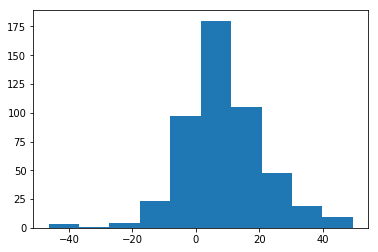

In [166]:
all_systole_high_low, removed, lidx, hidx = removeLowHigh(all_no_outliers_no_zero, 50, 'Systole')
compute_rmse(all_systole_high_low, 'all', val='S')
plt.hist(all_systole_high_low['Systole_diff'])

(497, 8)
(495, 8)
(490, 8)
all Diastole RMSE:  14.25229922959856


(array([  4.,   6.,  23.,  79., 123., 128.,  65.,  42.,  14.,   6.]),
 array([-47.16535541, -38.09552005, -29.02568469, -19.95584933,
        -10.88601397,  -1.81617861,   7.25365675,  16.32349211,
         25.39332747,  34.46316283,  43.53299819]),
 <a list of 10 Patch objects>)

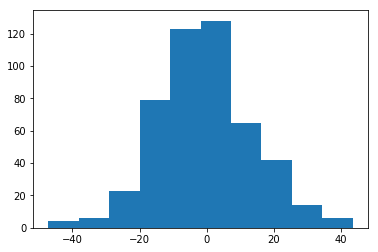

In [167]:
all_diastole_high_low, removed, lidx, hidx = removeLowHigh(all_no_outliers, 50, 'Diastole')
compute_rmse(all_diastole_high_low, 'all', val='D')
plt.hist(all_diastole_high_low['Diastole_diff'])

In [168]:
def compute_rmse(df, source, val = None):
    if val is None:
        sys = np.sqrt(sklearn.metrics.mean_squared_error(df['Systole'],df['Systole_P']))
        dia = np.sqrt(sklearn.metrics.mean_squared_error(df['Diastole'],df['Diastole_P']))
        ef = np.sqrt(sklearn.metrics.mean_squared_error(df['EF'],df['EF_P']))
        print (source,': Systole RMSE: ', sys, 'Diastole RMSE: ', dia, ': EF RMSE: ', ef)
    elif ('D') in val:
        dia = np.sqrt(sklearn.metrics.mean_squared_error(df['Diastole'],df['Diastole_P']))
        print (source,'Diastole RMSE: ', dia)
    elif ('S') in val:
        sys = np.sqrt(sklearn.metrics.mean_squared_error(df['Systole'],df['Systole_P']))
        print (source,': Systole RMSE: ', sys)
    elif ('E') in val:
        ef = np.sqrt(sklearn.metrics.mean_squared_error(df['EF'],df['EF_P']))
        print (source, ': EF RMSE: ', ef)

In [52]:
compute_rmse(train_df, 'Train')
compute_rmse(validate_df, 'Validate')
compute_rmse(all_df, 'Train + Validate')
compute_rmse(all_no_outliers, 'Train + Validate - Outliers')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [169]:
compute_rmse(all_no_outliers_no_zero, 'Train + Validate - Outliers')

Train + Validate - Outliers : Systole RMSE:  18.55584470165204 Diastole RMSE:  16.400975443854733 : EF RMSE:  0.1071251545506636


In [194]:
# Calculates the RMSE
rmseTrainSystole=np.sqrt(sklearn.metrics.mean_squared_error(train_df['Systole'],train_df['Systole_P']))
rmseTrainDiastole=np.sqrt(sklearn.metrics.mean_squared_error(train_df['Diastole'],train_df['Diastole_P']))
rmseValidateSystole=np.sqrt(sklearn.metrics.mean_squared_error(validate_df['Systole'],validate_df['Systole_P']))
rmseValidateDiastole=np.sqrt(sklearn.metrics.mean_squared_error(validate_df['Diastole'],validate_df['Diastole_P']))
rmseAllSystole=np.sqrt(sklearn.metrics.mean_squared_error(all_df['Systole'],all_df['Systole_P']))
rmseAllDiastole=np.sqrt(sklearn.metrics.mean_squared_error(all_df['Diastole'],all_df['Diastole_P']))
#rmseAllEF=np.sqrt(sklearn.metrics.mean_squared_error(all_df['EF'],all_df['EF_P']))


print ('Train Systole RMSE: ', rmseTrainSystole, 'Train Diastole RMSE: ', rmseTrainDiastole)
print ('Validate Systole RMSE: ', rmseValidateSystole, 'Validate Diastole RMSE: ', rmseValidateDiastole)
print ('Train + Validate Systole RMSE: ', rmseAllSystole, 'Train + Validate Diastole RMSE: ', rmseAllDiastole,
      'Train + Validate Diastole RMSE: ')#, rmseALLEF)

Train Systole RMSE:  21.62053587664091 Train Diastole RMSE:  30.134155137790984
Validate Systole RMSE:  20.705031894767185 Validate Diastole RMSE:  36.35860659092334
Train + Validate Systole RMSE:  21.36296712100584 Train + Validate Diastole RMSE:  32.03621405269209 Train + Validate Diastole RMSE: 


In [195]:
# Plotting Function
def plotting (df, actual, predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[predicted], df[actual],)
    plt.plot(range(len(df[predicted])), range(len(df[actual])), color = 'green')
    plt.xlabel(predicted)
    plt.ylabel(actual)
    plt.xlim(0,600)
    plt.ylim(0, 600)

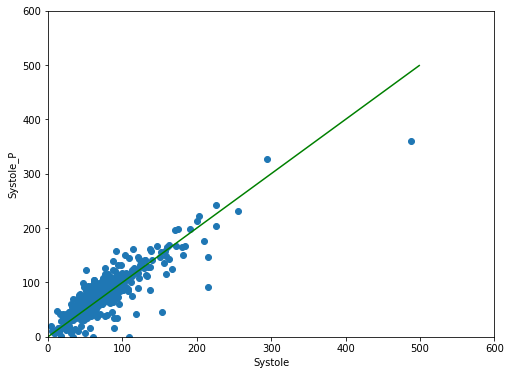

In [196]:
plotting(train_df, actual = 'Systole_P',predicted = 'Systole')

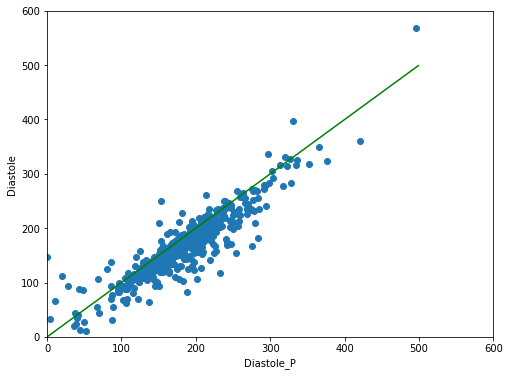

In [197]:
plotting(train_df, actual = 'Diastole',predicted = 'Diastole_P')

In [198]:
all_no_outliers.head()

,Systole,Diastole,Systole_P,Diastole_P,Systole_diff,Diastole_diff,EF_P,EF
Id,,,,,,,,
1,108.3,246.7,106.209699,244.229694,2.090301,2.470306,0.565124,0.561005
2,54.6,137.2,66.754174,144.320024,-12.154174,-7.120024,0.537457,0.602041
3,32.7,99.3,32.978000,108.875000,-0.278000,-9.575000,0.697102,0.670695
4,57.7,154.5,52.003999,177.292994,5.696001,-22.792994,0.706678,0.626537
5,83.3,235.5,89.547040,229.466100,-6.247040,6.033900,0.609759,0.646285


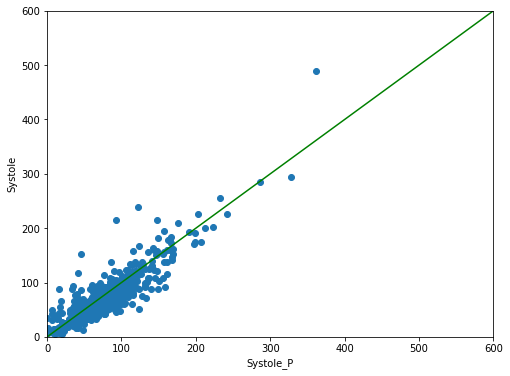

In [175]:
plotting(all_no_outliers_no_zero, actual = 'Systole',predicted = 'Systole_P')

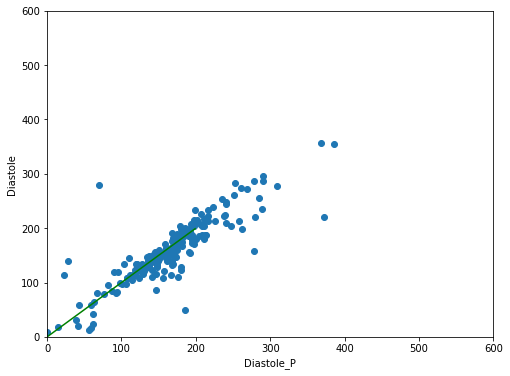

In [139]:
plotting(validate_df, actual = 'Diastole',predicted = 'Diastole_P')

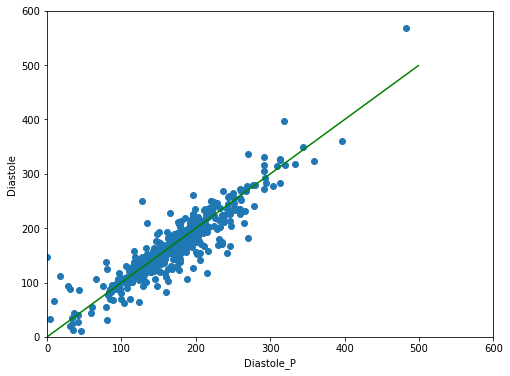

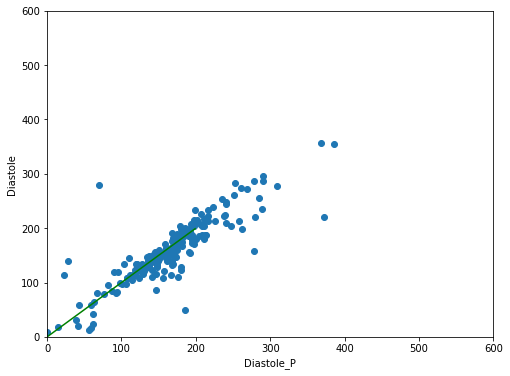

In [140]:
plotting(train_df, actual = 'Diastole',predicted = 'Diastole_P')
plotting(validate_df, actual = 'Diastole',predicted = 'Diastole_P')

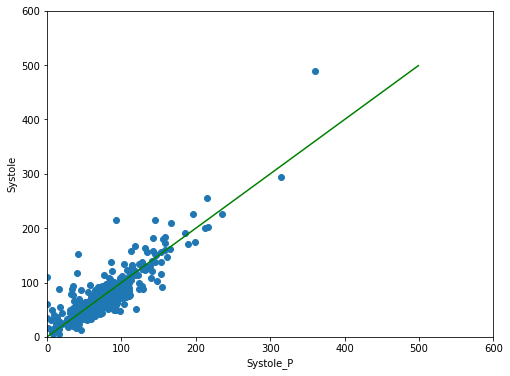

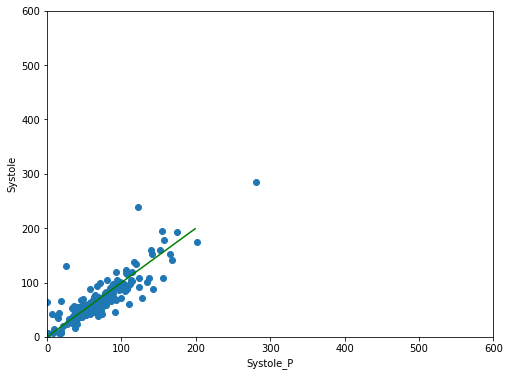

In [141]:
plotting(train_df, actual = 'Systole',predicted = 'Systole_P')
plotting(validate_df, actual = 'Systole',predicted = 'Systole_P')

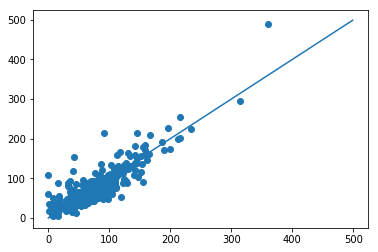

In [142]:
plt.scatter(train_df['Systole_P'],train_df['Systole'])
plt.plot(range(len(train_df['Systole_P'])),range(len(train_df['Systole'])))

In [176]:
# Counts the number of predictions that are higher or lower than the actual value
def estimateCheck (df, actual, predicted, dev):
    diff = df[actual]-df[predicted]
    if dev == 0: 
        low = diff[diff > 0].count()
        correct = diff[diff == 0].count()
        high = diff[diff < 0].count() 
        
    else:
        low = diff[diff > dev].count()
        correct = diff[(diff < 5) & (-5 < diff)].count()
        high = diff[diff < -dev].count()
        
    print ((low/len(df))+(high/len(df))+(correct/len(df)))
    print ('% Low Estimate: ', (low/len(df)), '% Correct Estimate: ', (correct/len(df)),'% High Estimate: ', (high/len(df)))

In [177]:
estimateCheck(all_no_outliers_no_zero, 'Systole','Systole_P', 0)
estimateCheck(all_no_outliers_no_zero, 'Diastole','Diastole_P',0)
estimateCheck(all_no_outliers_no_zero, 'EF','EF_P',0)

1.0
% Low Estimate:  0.3285302593659942 % Correct Estimate:  0.0 % High Estimate:  0.6714697406340058
1.0
% Low Estimate:  0.16714697406340057 % Correct Estimate:  0.0 % High Estimate:  0.8328530259365994
1.0
% Low Estimate:  0.4697406340057637 % Correct Estimate:  0.0 % High Estimate:  0.5302593659942363


In [145]:
estimateCheck(all_no_outliers, 'Systole','Systole_P',5)
estimateCheck(all_no_outliers, 'Diastole','Diastole_P',5)

1.0
% Low Estimate:  0.2564841498559078 % Correct Estimate:  0.3285302593659942 % High Estimate:  0.414985590778098
1.0
% Low Estimate:  0.33861671469740634 % Correct Estimate:  0.2276657060518732 % High Estimate:  0.43371757925072046


In [146]:
estimateCheck(all_systole_high_low, 'Systole','Systole_P',5)
estimateCheck(all_diastole_high_low, 'Systole','Systole_P',5)

1.0
% Low Estimate:  0.24742268041237114 % Correct Estimate:  0.33578792341678937 % High Estimate:  0.4167893961708395
1.0
% Low Estimate:  0.25306748466257667 % Correct Estimate:  0.34355828220858897 % High Estimate:  0.40337423312883436
